In [43]:
# %tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [10]:
# Dataset collection from keras
'''For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.'''

Dataset based on dress. Here several kind of dress and neural network have to define which is what kinbd of dress it is

In [5]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [6]:
train_images.shape    # In training set we hvae 60000 image and shape with 28*28(764) input value

(60000, 28, 28)

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [7]:
train_images[0,23,23]  # let's have a look at one pixel

# dont understand this line of code

194

 Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [22]:
'''
Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

'\nLabel\tClass\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

In [8]:
train_labels[:20]  # let's have a look at the first 10 training labels from upper box value where define.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
# Fianlly let's look at what some of these images look like!

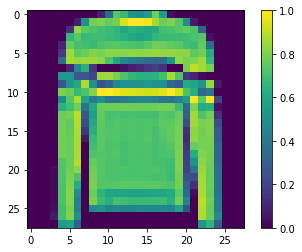

In [33]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0
# test_images

##### Building the Model

Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

#dense define here single neuron connect to the next all hidden layer neuron
#Flatten helps us to get 784 values and flating to 0 to 784 balue

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compile the Model

The last step in building the model is to define the loss function, optimizer and metrics we would like to track. 

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [14]:
model.fit(train_images, train_labels, epochs=1)  # we pass the data, labels and epochs and watch the magic!

60000/60000 [==============================] - 8s 138us/sample - loss: 0.5044 - acc: 0.8227


NOte:: If we calculate 20 epoch then our testing result and training result would be overfiting. because training accuracy comes 0.95 approximately but in testing here he accuracy only 0.889 thats mean its overfiting. So sometime run maximum epoch we could get worse model

#### Evaluating the Model

Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar." (https://keras.io/models/sequential/)

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.4672 - acc: 0.8317
Test accuracy: 0.8317


### Making Predictions

To make predictions we simply need to pass an array of data in the form we've specified in the input layer to .predict() method.

In [16]:
predictions = model.predict(test_images)

In [29]:
predictions[1]    # check which accuracy mot from 10 class

array([1.8918427e-05, 2.5153172e-06, 9.8890746e-01, 2.1145606e-05,
       3.8959989e-03, 1.1372872e-09, 7.1526612e-03, 1.5399780e-11,
       1.2488031e-06, 2.0728572e-10], dtype=float32)

In [31]:
print(class_names[np.argmax(predictions[1])])

Pullover


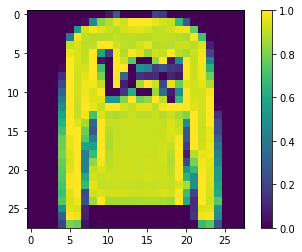

In [32]:
#lets try to see the output
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#### Verifying Predictions

I've written a small function here to help us verify predictions with some simple visuals.

Pick a number: 2


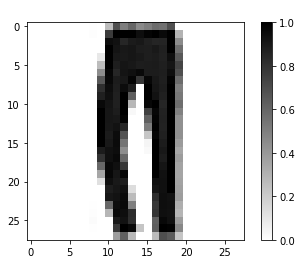

In [35]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)